Comparison of QR DMD to Zhang et al. Online Dynamic Mode Decomposition for Time-Varying Systems

- https://epubs.siam.org/doi/abs/10.1137/18M1192329?journalCode=sjaday

using their data & code

https://github.com/haozhg/odmd

In [2]:
%run fDMD_functions.ipynb

from scipy.integrate import odeint
from odmd import OnlineDMD
import time

Njihovo

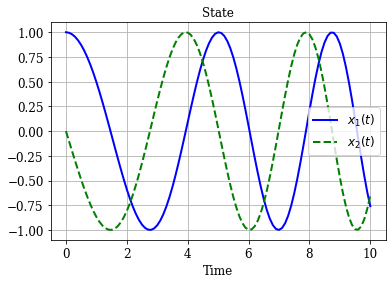

In [3]:
## prepisano iz njihovog

# define dynamics
epsilon = 1e-1
def dyn(x, t):
    x1, x2 = x
    dxdt = [(1+epsilon*t)*x2, -(1+epsilon*t)*x1]
    return dxdt

# integrate from initial condition [1,0]
tspan = np.linspace(0, 10, 101)
dt = 0.1
x0 = [1, 0]
xsol = odeint(dyn, x0, tspan).T
# extract snapshots
x, y = xsol[:, :-1], xsol[:, 1:]
t = tspan[1:]
# true dynamics, true eigenvalues
n, m = len(x[:, 0]), len(x[0, :])
A = np.empty((n, n, m))
evals = np.empty((n, m), dtype=complex)
for k in range(m):
    A[:, :, k] = np.array([[0, (1+epsilon*t[k])], [-(1+epsilon*t[k]), 0]])
    evals[:, k] = np.linalg.eigvals(A[:, :, k])

# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'b-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'g--', linewidth=2.0,  label='$x_2(t)$')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid()
plt.show()


#####################################################################################################################################
#   u x i u y su spremljeni podaci. evals su prave sv vrijednosti od A

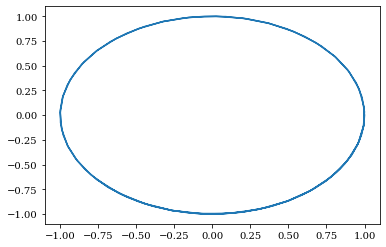

In [4]:
#rjesenja su na jedinicnoj kruznici
plt.plot(xsol[0,:], xsol[1,:])

In [5]:
q = 10 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x[:, :q], y[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x[:, k], y[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Online DMD, weighting = 1, time = 0.0053751468658447266 secs


In [6]:
Lambda, Z = odmd.computemodes()

In [7]:
Lambda
Z

array([[ 0.71+0.j ,  0.71-0.j ],
       [-0.01+0.7j, -0.01-0.7j]])

Nase

In [8]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:q], y[:,:q])
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)

In [9]:
print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

Our eigs
[0.99+0.15j 0.99-0.15j]
Zhang eigs
[0.99+0.15j 0.99-0.15j]
Our modes
[[-0.5 -0.51j -0.5 +0.51j]
 [ 0.51-0.48j  0.51+0.48j]]
Zhang modes
[[ 0.71+0.j   0.71-0.j ]
 [-0.01+0.7j -0.01-0.7j]]


In [10]:
#koje modove dobijem ako odmah ubacim sve x i y?
Z_nas_svi, Lambda_nas_svi, r, Q, L = fGEDMDQ_multiple_trajectories(x, y)

In [11]:
print("Our batch modes", Z_nas_svi, sep="\n")
print("Our batch eigs", Lambda_nas_svi, sep="\n")

Our batch modes
[[-0.5 -0.51j -0.5 +0.51j]
 [ 0.51-0.48j  0.51+0.48j]]
Our batch eigs
[0.99+0.15j 0.99-0.15j]


In [12]:
indices=np.array([0,1]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x, Z_nas, indices, Lambda_nas, times)

In [13]:
#nas reconstruction za njihov dmd..
reconstructed_njihovo = DMD_reconstruction(x, Z, indices, Lambda, times)

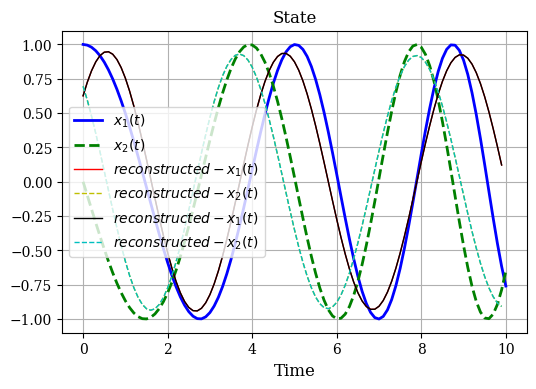

In [19]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'b-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'g--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-1], reconstructed[0, :], 'r-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed[1, :], 'y--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[0, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()